# LOAN DATA

In [11]:
import warnings
warnings.simplefilter("ignore")

# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Load Dataset

In [6]:
df=pd.read_csv(r"C:\Users\user\Downloads\loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


<!-- # PREPROCESSING -->

# EDA

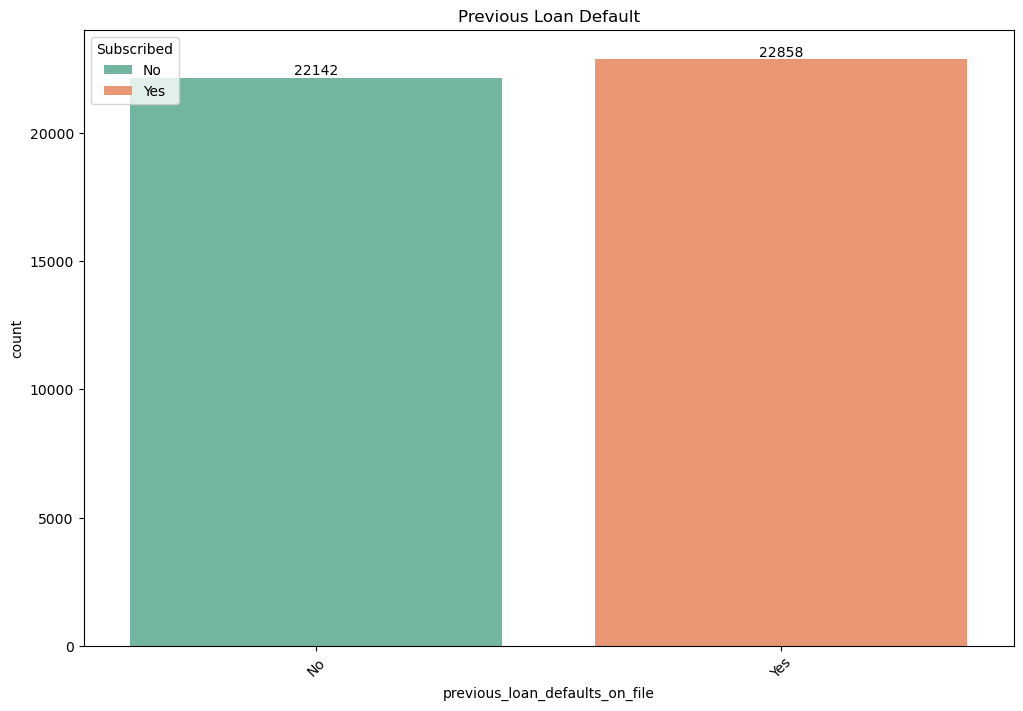

In [150]:
plt.figure(figsize=(12, 8))
ax=sns.countplot(data=df,x="previous_loan_defaults_on_file",palette='Set2')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Previous Loan Default")
plt.legend(title='Subscribed', labels=['No', 'Yes'],loc="upper left")
plt.show()

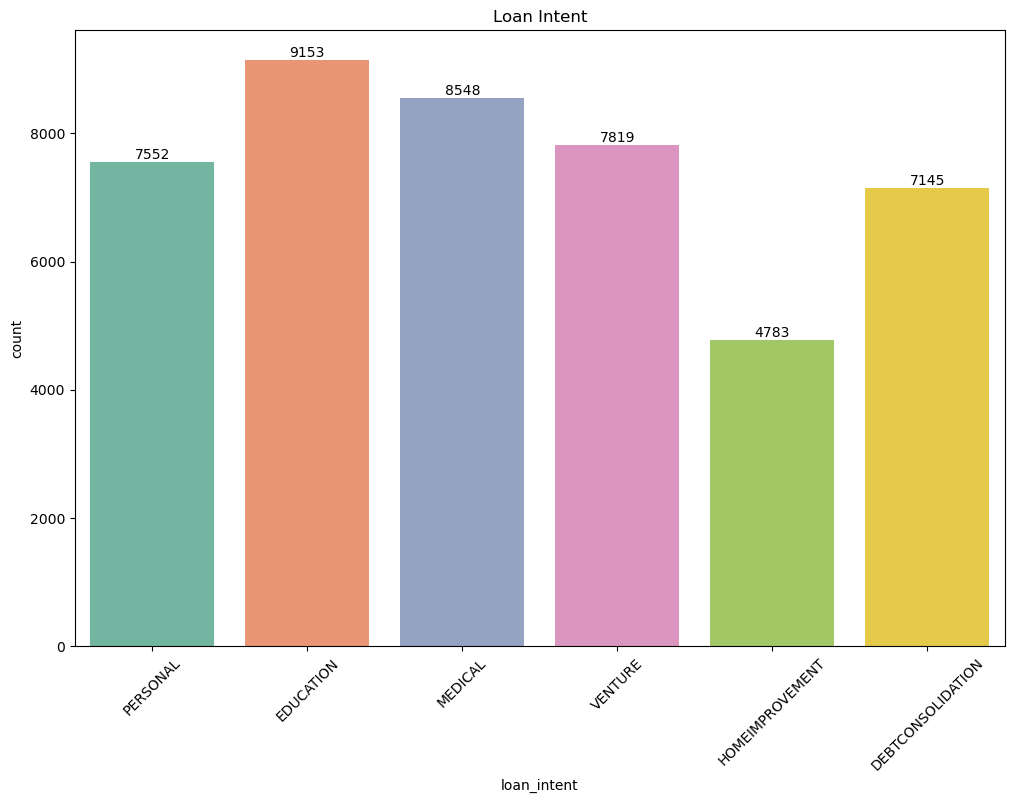

In [152]:
plt.figure(figsize=(12, 8))
ax=sns.countplot(data=df,x='loan_intent',palette='Set2')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
ax.bar_label(ax.containers[5])
plt.title("Loan Intent")
plt.show()

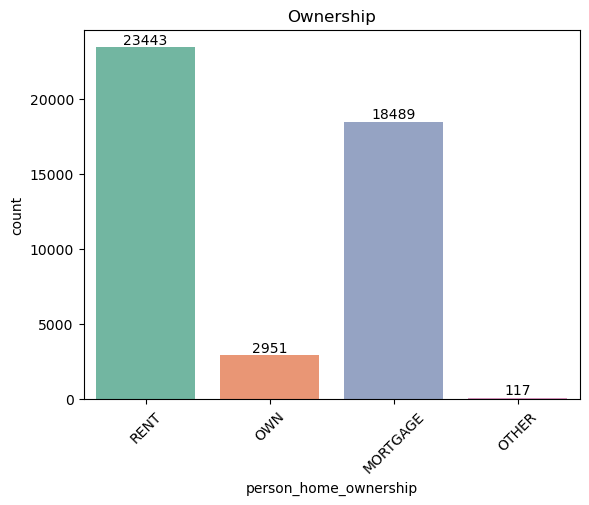

In [154]:
ax=sns.countplot(data=df,x='person_home_ownership',palette='Set2')
plt.xticks(rotation=45)
# Add labels to both bars (if both exist)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
plt.title("Ownership")
plt.show()

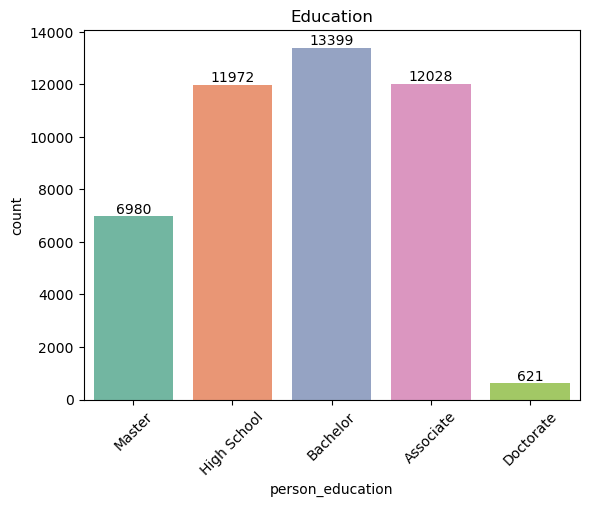

In [156]:
ax=sns.countplot(data=df,x='person_education',palette='Set2')
plt.xticks(rotation=45)
# Add labels to both bars (if both exist)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
plt.title("Education")
plt.show()

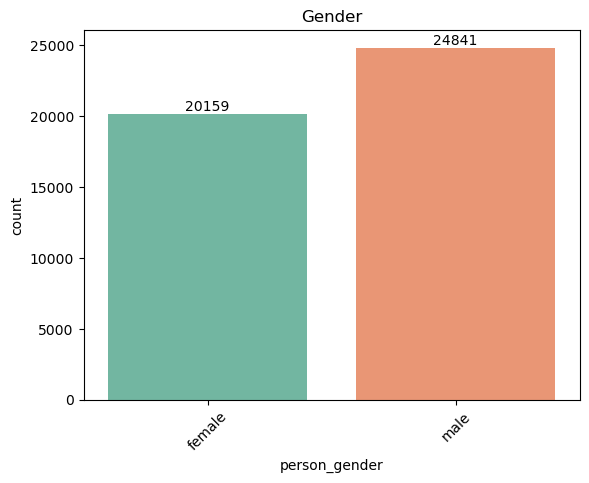

In [158]:
ax=sns.countplot(data=df,x='person_gender',palette='Set2')
plt.xticks(rotation=45)
# Add labels to both bars (if both exist)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Gender")
plt.show()

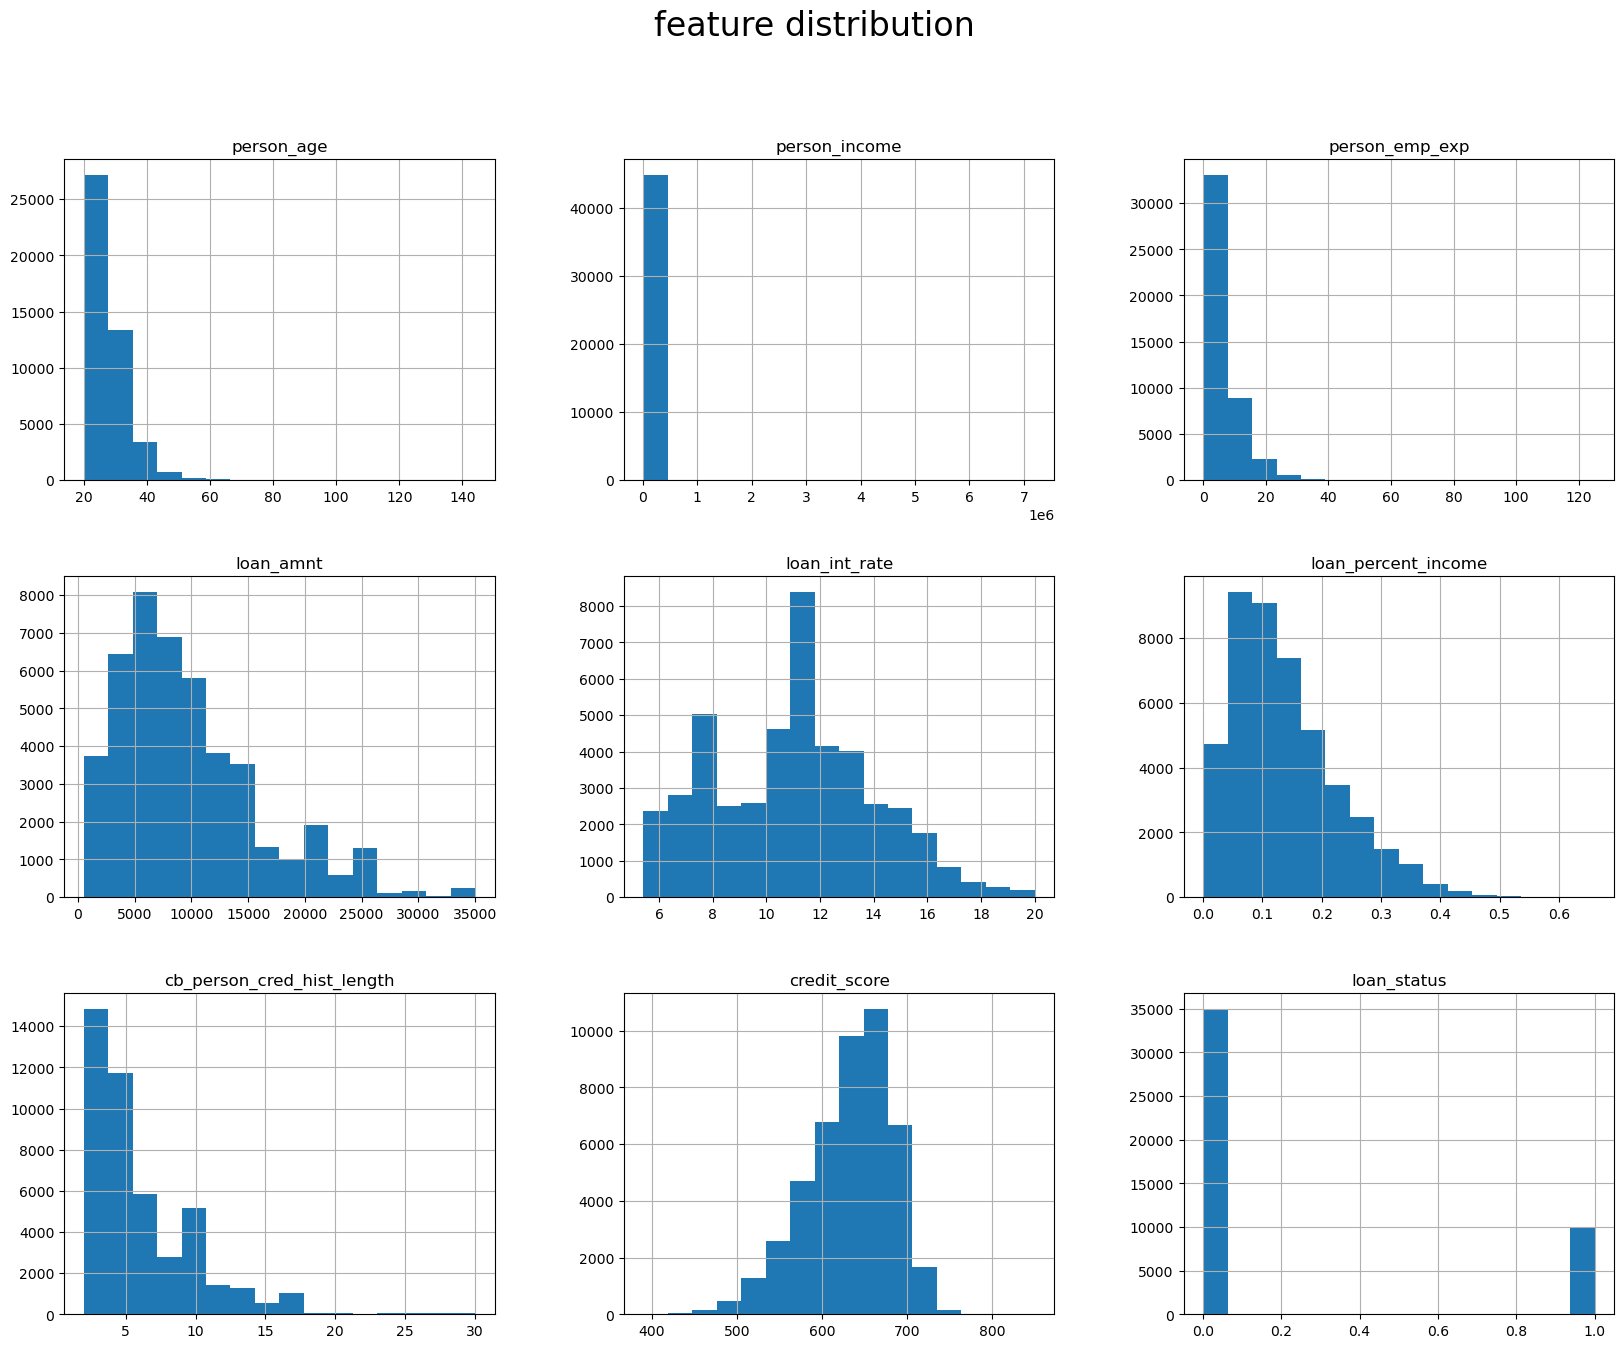

In [31]:
df.hist(figsize=(20,15),bins=16)
plt.suptitle("feature distribution",fontsize=24)
plt.show()

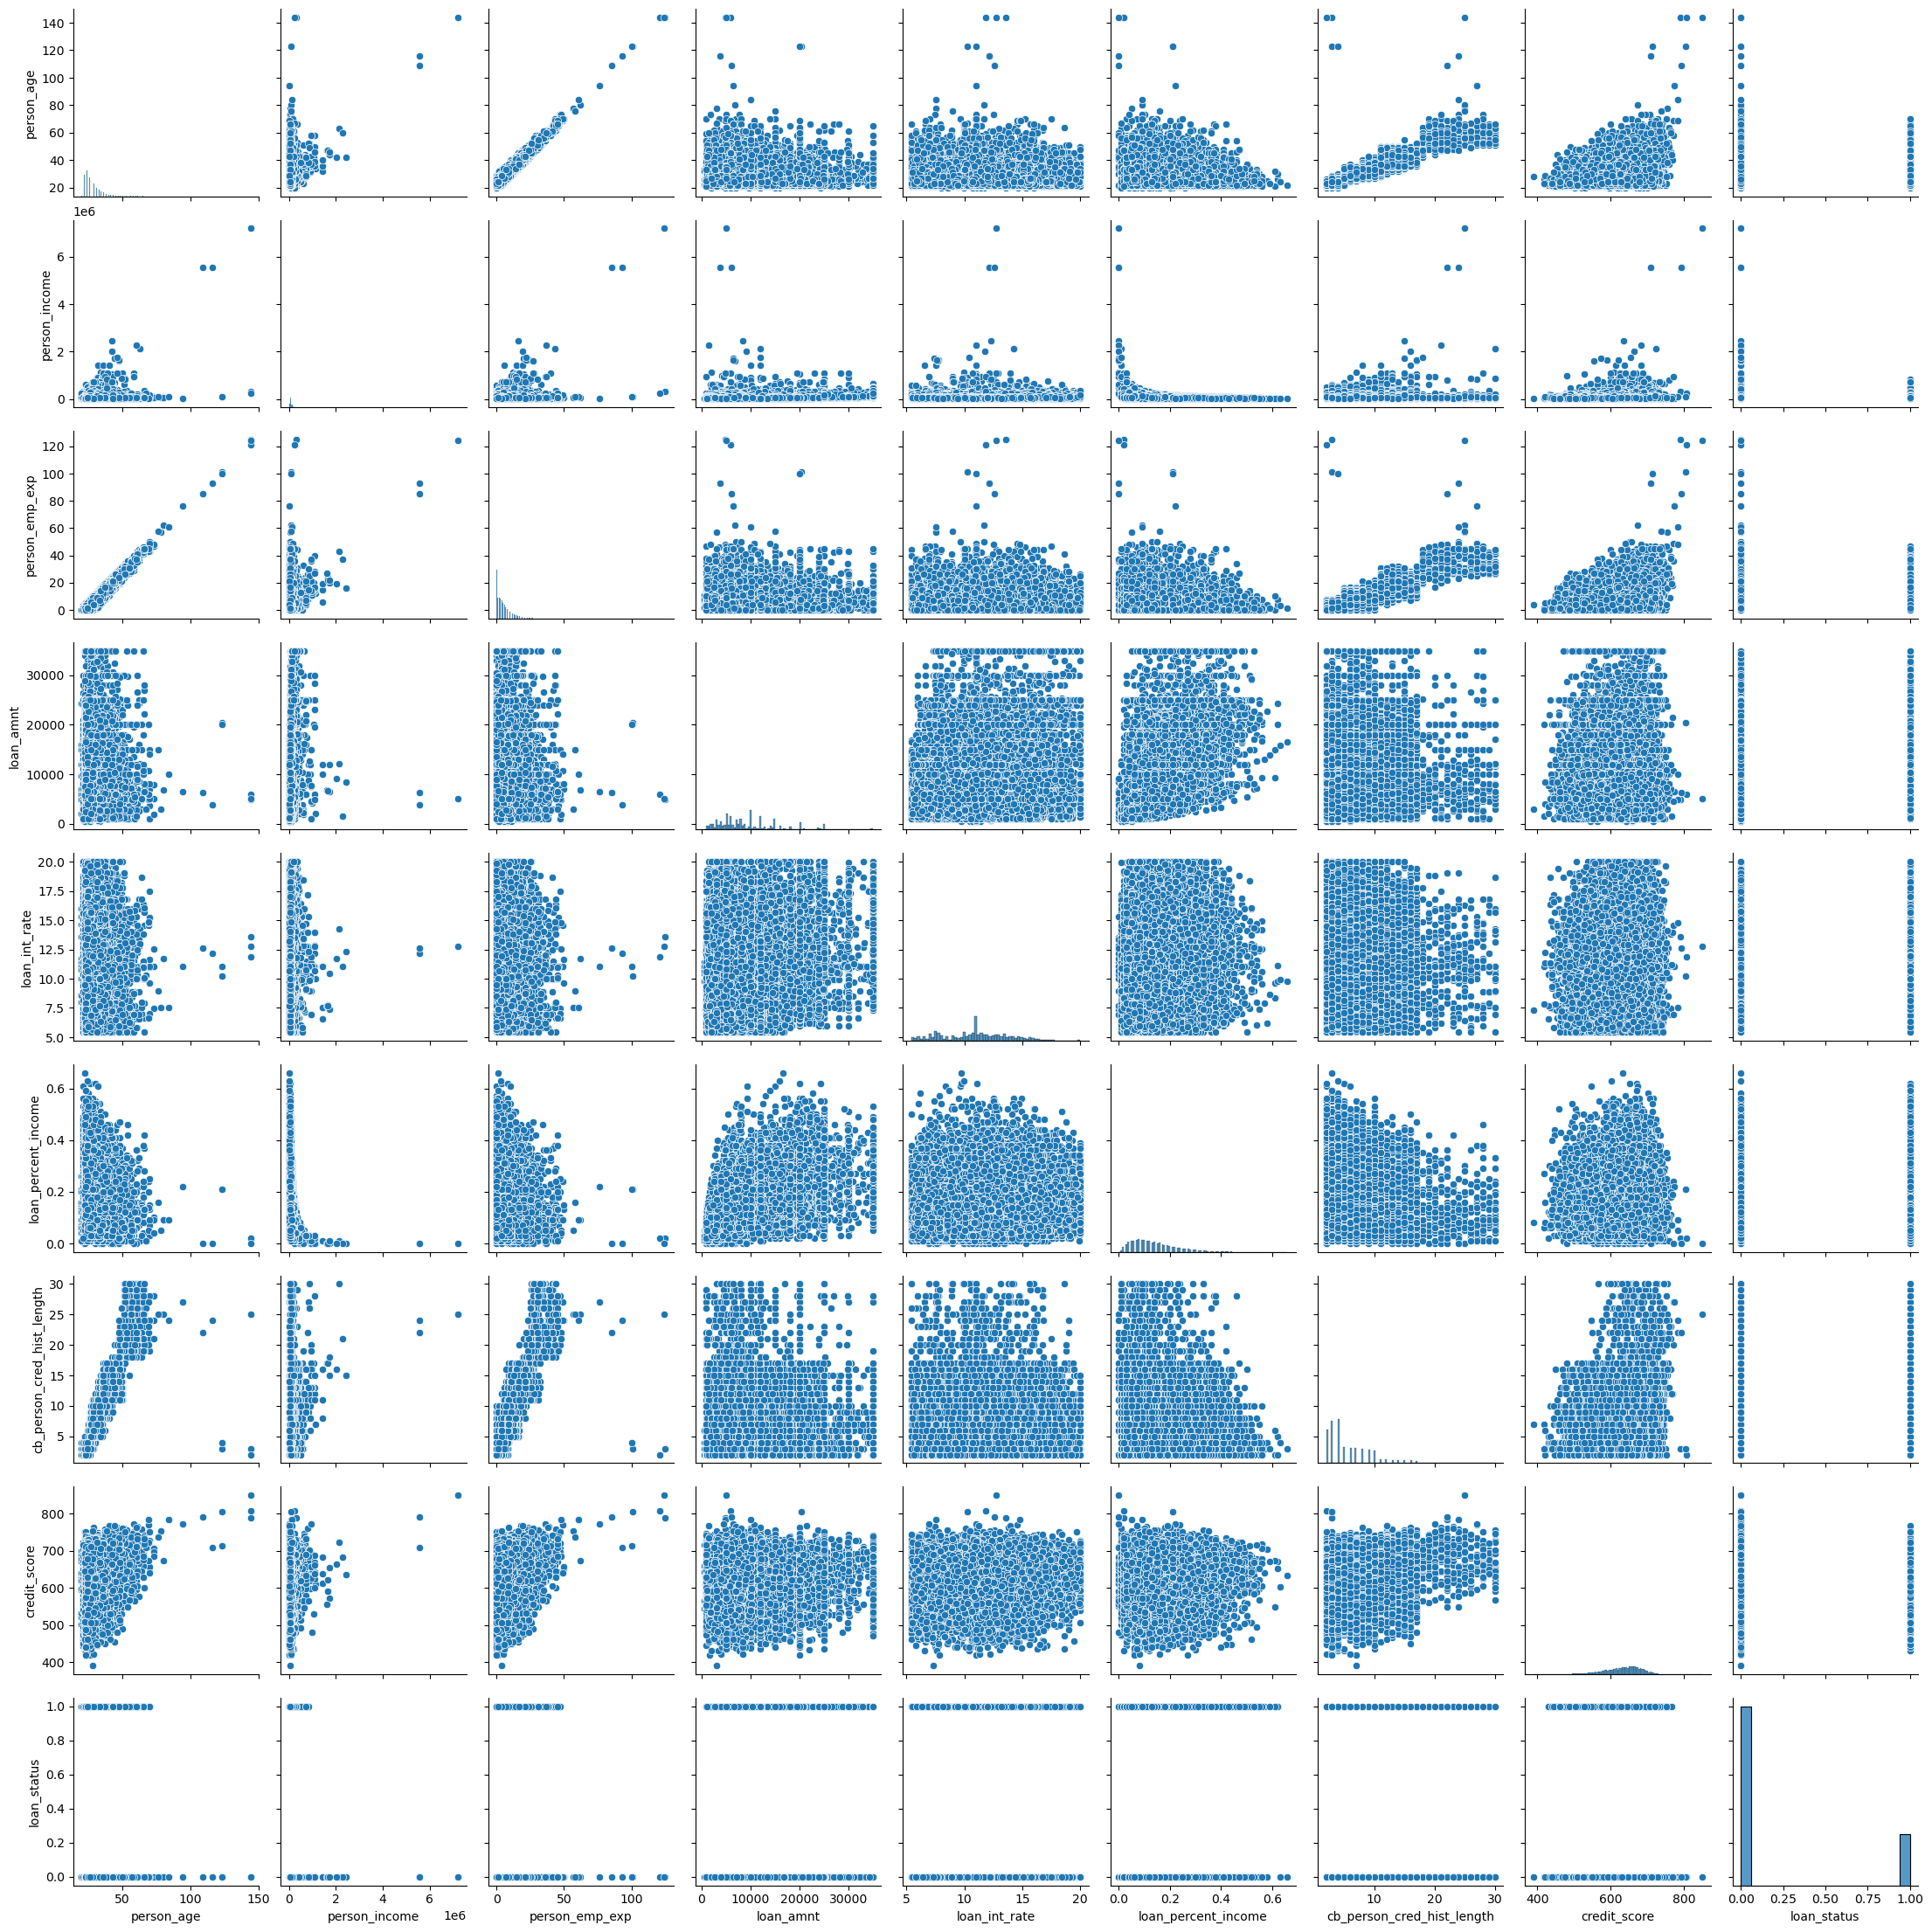

In [33]:
sns.pairplot(df)
plt.show()

In [35]:
df.select_dtypes(include='number').columns

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')

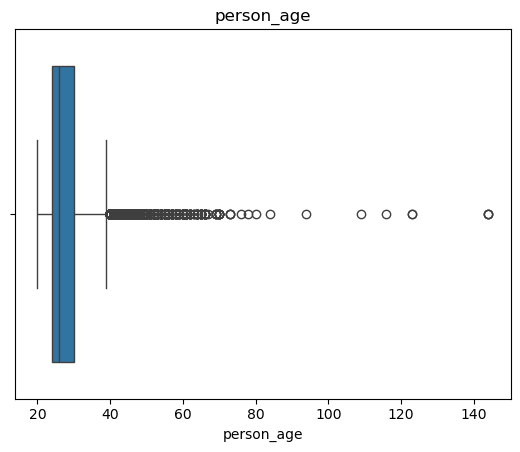

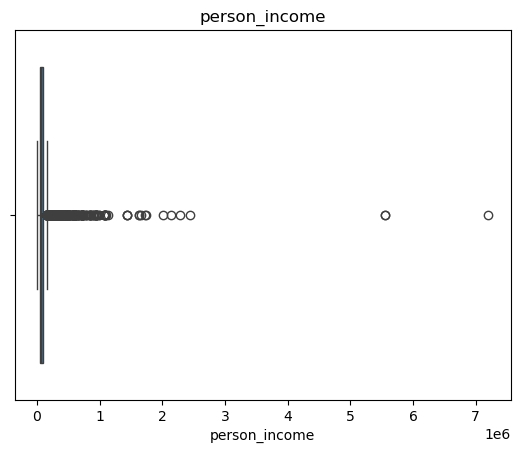

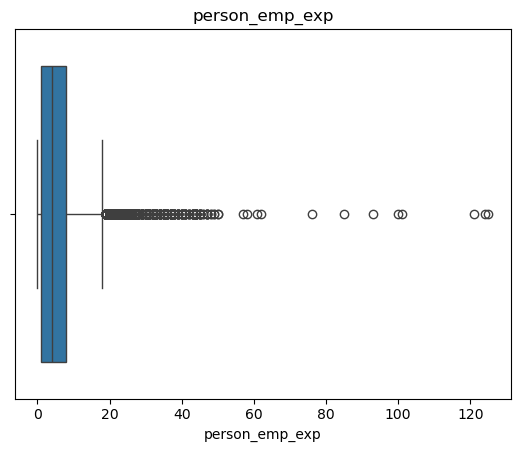

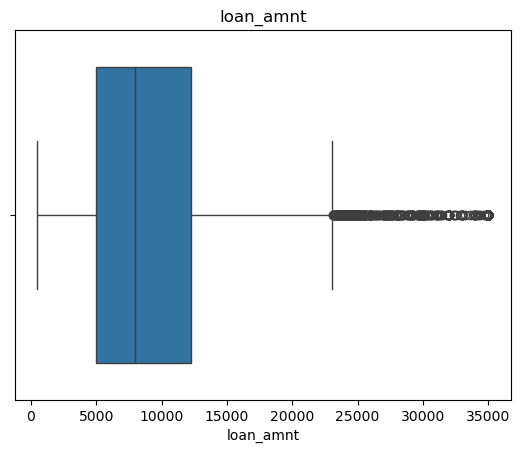

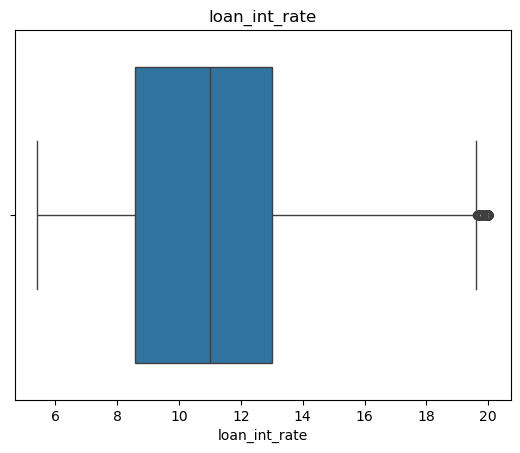

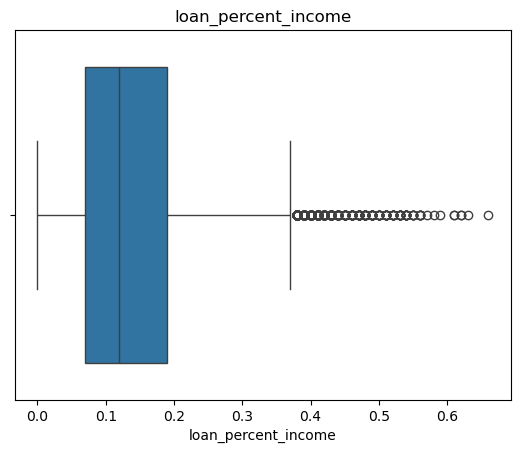

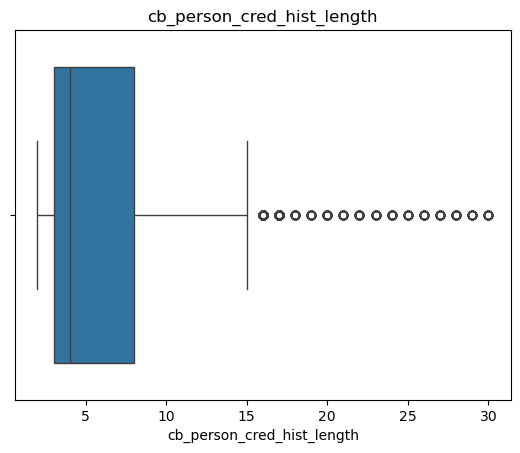

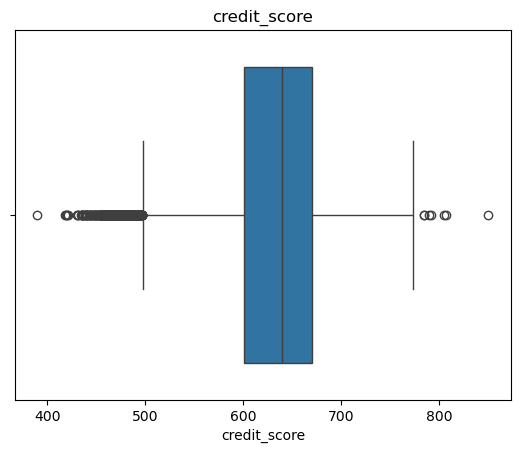

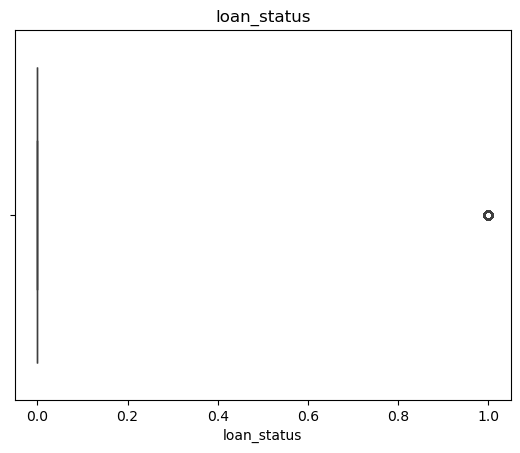

In [36]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.title(i)
    plt.show()

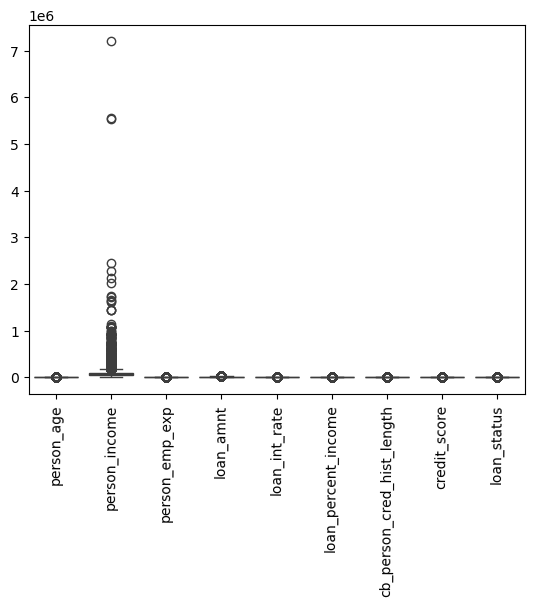

In [179]:
sns.boxplot(df)
plt.xticks(rotation=89.5)
plt.show()

# Correlation Heatmap

In [39]:
correlation=df.select_dtypes(include='number').corr()
correlation

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647
loan_status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000


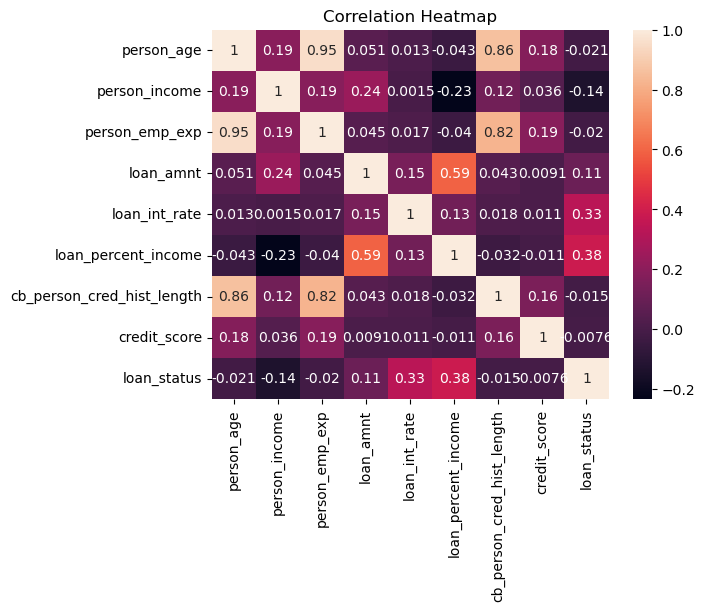

In [40]:
sns.heatmap(correlation,annot=True)      
plt.title("Correlation Heatmap")
plt.show()

# Preprocessing

In [43]:
df.size

630000

In [44]:
df.shape

(45000, 14)

In [45]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [46]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [47]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [48]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [49]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [16]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
44995    False
44996    False
44997    False
44998    False
44999    False
Length: 45000, dtype: bool

In [51]:
# to check is dupicate rows present or not
df.duplicated().sum()

0

In [55]:
df.value_counts()

person_age  person_gender  person_education  person_income  person_emp_exp  person_home_ownership  loan_amnt  loan_intent  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  credit_score  previous_loan_defaults_on_file  loan_status
20.0        female         Associate         42674.0        0               RENT                   7000.0     MEDICAL      13.61          0.16                 2.0                         636           Yes                             0              1
29.0        female         Associate         53840.0        7               MORTGAGE               24000.0    MEDICAL      6.91           0.45                 8.0                         680           Yes                             0              1
                                             51488.0        7               RENT                   1600.0     VENTURE      19.16          0.03                 6.0                         526           Yes                             0              1
     

In [56]:
#findig count of each item
df['person_income'].value_counts()

person_income
8000.0      15
73011.0     10
36995.0      9
60914.0      8
37020.0      8
            ..
259923.0     1
40186.0      1
69485.0      1
50351.0      1
33164.0      1
Name: count, Length: 33989, dtype: int64

In [57]:
df["loan_intent"].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [58]:
df["person_home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [59]:
df["person_education"].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [60]:
df.nunique()

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [62]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [65]:
# if nan values present or not in each column
df.isna().any()

person_age                        False
person_gender                     False
person_education                  False
person_income                     False
person_emp_exp                    False
person_home_ownership             False
loan_amnt                         False
loan_intent                       False
loan_int_rate                     False
loan_percent_income               False
cb_person_cred_hist_length        False
credit_score                      False
previous_loan_defaults_on_file    False
loan_status                       False
dtype: bool

In [67]:
df.isnull().sum()/df.shape[0]*100

person_age                        0.0
person_gender                     0.0
person_education                  0.0
person_income                     0.0
person_emp_exp                    0.0
person_home_ownership             0.0
loan_amnt                         0.0
loan_intent                       0.0
loan_int_rate                     0.0
loan_percent_income               0.0
cb_person_cred_hist_length        0.0
credit_score                      0.0
previous_loan_defaults_on_file    0.0
loan_status                       0.0
dtype: float64

# Outerliear Detection

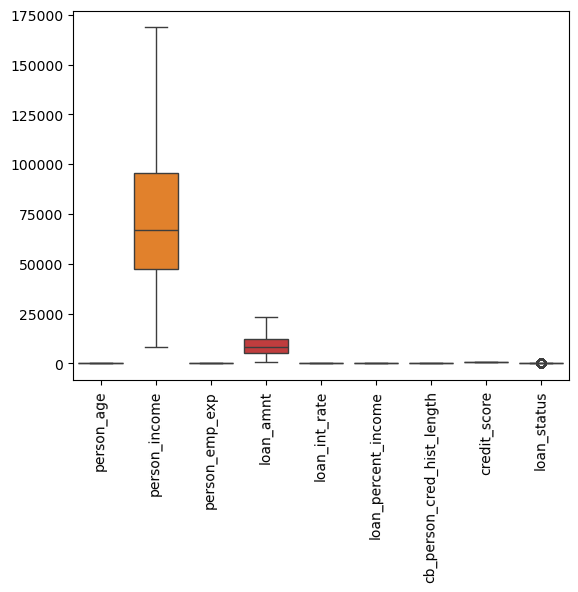

In [13]:
lst=["person_age","person_income","person_emp_exp","loan_amnt","loan_int_rate","cb_person_cred_hist_length","credit_score","loan_percent_income"]

for i in lst:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  df.loc[(df[i]>=upper_limit),i]=upper_limit
  df.loc[(df[i]<=lower_limit),i]=lower_limit
sns.boxplot(df)

plt.xticks(rotation=89.5)
plt.show()

# LabelEncoder

In [33]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le1=LabelEncoder()

In [37]:
df["person_gender"]=le1.fit_transform(df["person_gender"])

In [39]:
le2=LabelEncoder()

In [41]:
df["person_education"]=le2.fit_transform(df["person_education"])

In [43]:
le3=LabelEncoder()

In [45]:
df["person_home_ownership"]=le3.fit_transform(df["person_home_ownership"])

In [47]:
le4=LabelEncoder()

In [49]:
df["loan_intent"]=le4.fit_transform(df["loan_intent"])

In [51]:
le5=LabelEncoder()

In [53]:
df["previous_loan_defaults_on_file"]=le5.fit_transform(df["previous_loan_defaults_on_file"])

In [59]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


# Define Features & Target

In [62]:
x=df.drop(columns=["loan_status"])

In [64]:
x

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0


In [66]:
y=df["loan_status"]

In [68]:
y

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 45000, dtype: int64

In [70]:
y.value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

# Spliting Data

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

# Standardize Numerical Features

In [76]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler=StandardScaler()

In [80]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### LOGISTIC REGRESSION

In [82]:
logistic=LogisticRegression()

In [84]:
logistic.fit(x_train,y_train)

LogisticRegression()

Test score: 0.892074074074074
train score: 0.8906031746031746
CR:               precision    recall  f1-score   support

           0       0.93      0.93      0.93     10503
           1       0.76      0.75      0.76      2997

    accuracy                           0.89     13500
   macro avg       0.84      0.84      0.84     13500
weighted avg       0.89      0.89      0.89     13500

Test accuracy: 89.2074074074074
Train accuracy: 89.06031746031746


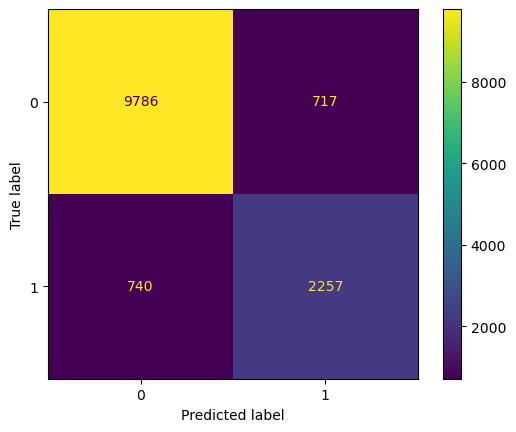

In [86]:
y_testpred=logistic.predict(x_test)
y_trainpred=logistic.predict(x_train)
print('Test score:',logistic.score(x_test,y_test))
print('train score:',logistic.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
lrt=accuracy_score(y_test,y_testpred)*100
lrr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',lrt)
print('Train accuracy:',lrr)

### RANDOM FOREST

In [232]:
random=RandomForestClassifier(n_estimators=5,random_state=10)

In [234]:
random.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=10)

Test accuracy: 0.91
train accuracy: 0.9888888888888889
CR:               precision    recall  f1-score   support

           0       0.93      0.95      0.94     10503
           1       0.82      0.77      0.79      2997

    accuracy                           0.91     13500
   macro avg       0.88      0.86      0.87     13500
weighted avg       0.91      0.91      0.91     13500

Test accuracy: 91.0
Train accuracy: 98.88888888888889


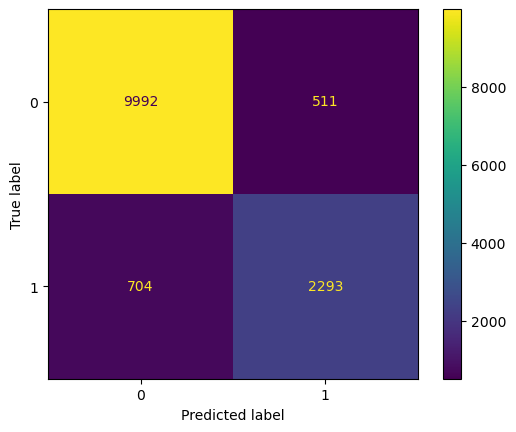

In [236]:
y_testpred=random.predict(x_test)
y_trainpred=random.predict(x_train)
print('Test accuracy:',random.score(x_test,y_test))
print('train accuracy:',random.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
rft=accuracy_score(y_test,y_testpred)*100
rfr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',rft)
print('Train accuracy:',rfr)

### SUPPORT VECTOR CLASSIFIER (SVC)

In [239]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

Test score: 0.8934814814814814
train score: 0.8920317460317461
CR:               precision    recall  f1-score   support

           0       0.93      0.94      0.93     10503
           1       0.77      0.75      0.76      2997

    accuracy                           0.89     13500
   macro avg       0.85      0.84      0.84     13500
weighted avg       0.89      0.89      0.89     13500

Test accuracy: 89.34814814814814
Train accuracy: 89.2031746031746


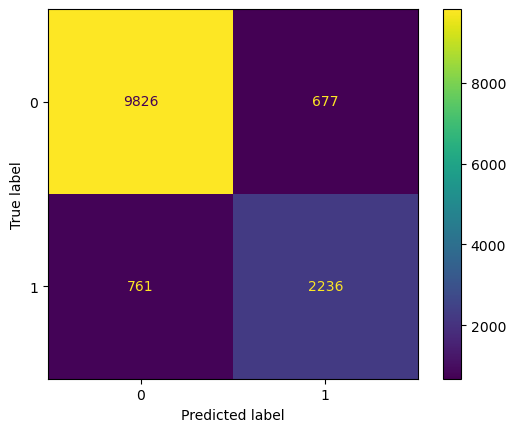

In [240]:
y_testpred=svm.predict(x_test)
y_trainpred=svm.predict(x_train)
print('Test score:',svm.score(x_test,y_test))
print('train score:',svm.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
svt=accuracy_score(y_test,y_testpred)*100
svr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',svt)
print('Train accuracy:',svr)

### DECISION TREE

In [242]:
dtree= DecisionTreeClassifier()

In [243]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

Test accuracy: 0.8957037037037037
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.94      0.93      0.93     10503
           1       0.76      0.78      0.77      2997

    accuracy                           0.90     13500
   macro avg       0.85      0.85      0.85     13500
weighted avg       0.90      0.90      0.90     13500

Test accuracy: 89.57037037037037
Train accuracy: 100.0


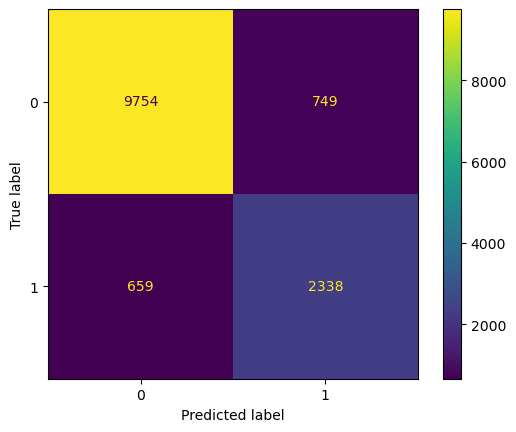

In [244]:
y_testpred=dtree.predict(x_test)
y_trainpred=dtree.predict(x_train)
print('Test accuracy:',dtree.score(x_test,y_test))
print('train accuracy:',dtree.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
dtt=accuracy_score(y_test,y_testpred)*100
dtr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',dtt)
print('Train accuracy:',dtr)

### K NEAREST NEIGHBOUR (KNN)

In [246]:
knn= KNeighborsClassifier()

In [247]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

Test accuracy: 0.8899259259259259
train accuracy: 0.924063492063492
CR:               precision    recall  f1-score   support

           0       0.92      0.94      0.93     10503
           1       0.77      0.71      0.74      2997

    accuracy                           0.89     13500
   macro avg       0.85      0.83      0.84     13500
weighted avg       0.89      0.89      0.89     13500

Test accuracy: 88.99259259259259
Train accuracy: 92.4063492063492


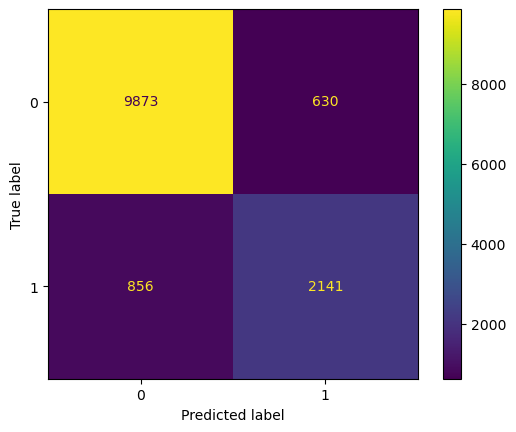

In [248]:
y_testpred=knn.predict(x_test)
y_trainpred=knn.predict(x_train)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
knnt=accuracy_score(y_test,y_testpred)*100
knnr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',knnt)
print('Train accuracy:',knnr)

### NAIVE BAYES (GaussianNB)

In [250]:
gaus=GaussianNB()

In [251]:
gaus.fit(x_train,y_train)

GaussianNB()

Test accuracy: 0.778
train accuracy: 0.7280952380952381
CR:               precision    recall  f1-score   support

           0       0.78      1.00      0.88     10503
           1       0.00      0.00      0.00      2997

    accuracy                           0.78     13500
   macro avg       0.39      0.50      0.44     13500
weighted avg       0.61      0.78      0.68     13500

Test accuracy: 77.8
Train accuracy: 72.80952380952381


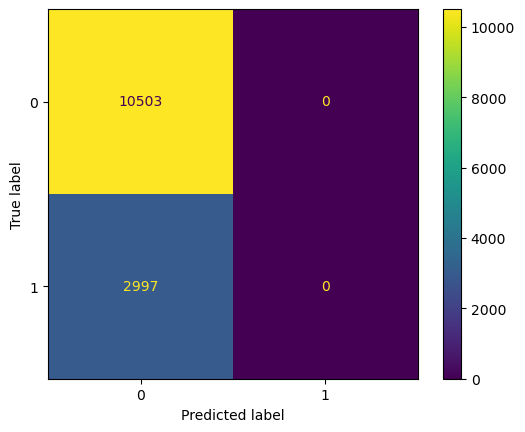

In [252]:
y_testpred=gaus.predict(x_test)
y_trainpred=gaus.predict(x_train)
print('Test accuracy:',gaus.score(x_test,y_test))
print('train accuracy:',gaus.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gnb=accuracy_score(y_test,y_testpred)*100
gn=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gnb)
print('Train accuracy:',gn)

# ENSEMBLE MODEL

### GradientBoosting

In [255]:
gradient=GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,random_state=25)

In [256]:
gradient.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=25)

Test accuracy: 0.8957777777777778
train accuracy: 0.8958412698412699
CR:               precision    recall  f1-score   support

           0       0.90      0.97      0.94     10503
           1       0.87      0.62      0.73      2997

    accuracy                           0.90     13500
   macro avg       0.89      0.80      0.83     13500
weighted avg       0.89      0.90      0.89     13500

Test accuracy: 89.57777777777778
Train accuracy: 89.58412698412698


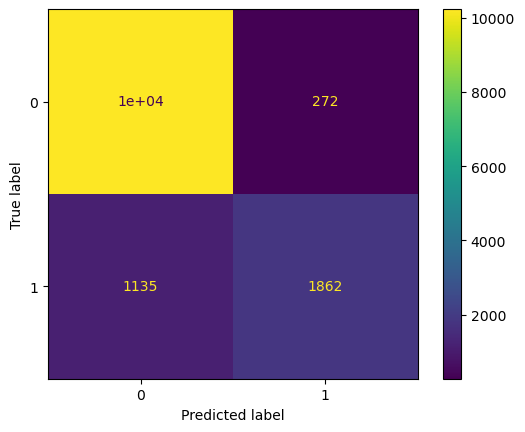

In [257]:
y_testpred=gradient.predict(x_test)
y_trainpred=gradient.predict(x_train)
print('Test accuracy:',gradient.score(x_test,y_test))
print('train accuracy:',gradient.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gb=accuracy_score(y_test,y_testpred)*100
gbr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gb)
print('Train accuracy:',gbr)

### AdaBoost

In [259]:
adaboost=AdaBoostClassifier(n_estimators=50,estimator=None,learning_rate=0.3,random_state=1)

In [260]:
adaboost.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.3, random_state=1)

Test accuracy: 0.9118518518518518
train accuracy: 0.910952380952381
CR:               precision    recall  f1-score   support

           0       0.93      0.95      0.94     10503
           1       0.82      0.77      0.79      2997

    accuracy                           0.91     13500
   macro avg       0.88      0.86      0.87     13500
weighted avg       0.91      0.91      0.91     13500

Test accuracy: 91.18518518518518
Train accuracy: 91.0952380952381


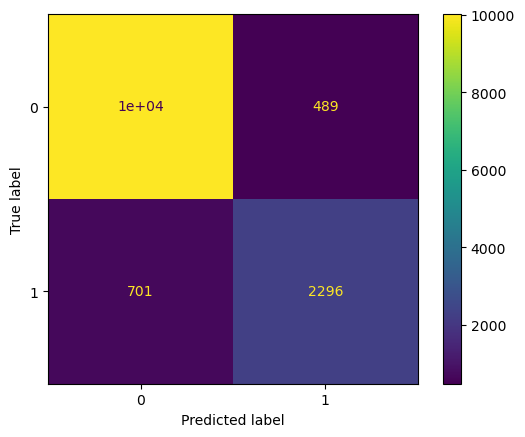

In [261]:
y_testpred=adaboost.predict(x_test)
y_trainpred=adaboost.predict(x_train)
print('Test accuracy:',adaboost.score(x_test,y_test))
print('train accuracy:',adaboost.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
adt=accuracy_score(y_test,y_testpred)*100
adr=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',adt)
print('Train accuracy:',adr)

### XGBClassifier

In [263]:
xg_model=XGBClassifier()

In [264]:
xg_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Test accuracy: 0.8654814814814815
train accuracy: 0.9741904761904762
CR:               precision    recall  f1-score   support

           0       0.93      0.89      0.91     10503
           1       0.67      0.78      0.72      2997

    accuracy                           0.87     13500
   macro avg       0.80      0.83      0.82     13500
weighted avg       0.87      0.87      0.87     13500

Test accuracy: 86.54814814814816
Train accuracy: 97.41904761904762


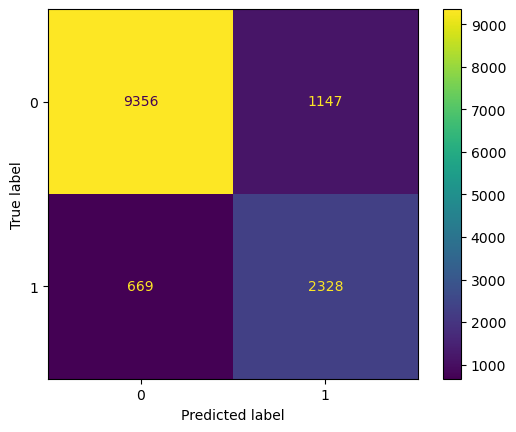

In [265]:
y_testpred=xg_model.predict(x_test)
y_trainpred=xg_model.predict(x_train)
print('Test accuracy:',xg_model.score(x_test,y_test))
print('train accuracy:',xg_model.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
xg=accuracy_score(y_test,y_testpred)*100
xgg=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',xg)
print('Train accuracy:',xgg)

In [266]:
tb=pd.DataFrame()
tb['model']=pd.Series(["logistic","random","svm","dtree","knn","gaus","gradient","adaboost","xg_model"])
tb['test_accuracy'] = pd.Series([lrt,rft,svt,dtt,knnt,gnb,gb,adt,xg])
tb['train_accuracy'] = pd.Series([lrr,rfr,svr,dtr,knnr,gn,gbr,adr,xgg])
tb

,model,test_accuracy,train_accuracy
0,logistic,89.133333,89.101587
1,random,91.000000,98.888889
2,svm,89.348148,89.203175
3,dtree,89.570370,100.000000
4,knn,88.992593,92.406349
5,gaus,77.800000,72.809524
6,gradient,89.577778,89.584127
7,adaboost,91.185185,91.095238
8,xg_model,86.548148,97.419048


# SMOTE

In [268]:
from imblearn.over_sampling import SMOTE
from collections import Counter 
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)
print("After SMOTE:", Counter(y_resampled))

After SMOTE: Counter({1: 35000, 0: 35000})


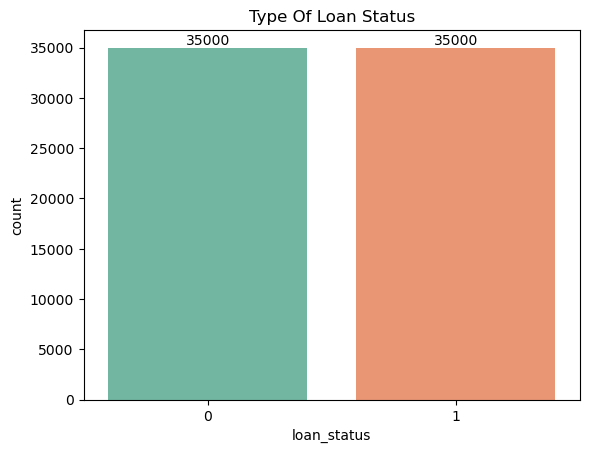

In [269]:
ax=sns.countplot(data=df,x=y_resampled,palette='Set2')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Type Of Loan Status")
plt.show()

# Spliting Data

In [271]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=10)

# After Smote Applying Multiple ML Models

### LOGISTIC REGRESSION

In [274]:
logistic_model=LogisticRegression()

In [275]:
logistic_model.fit(x_resampled,y_resampled)

LogisticRegression()

Test score: 0.7949047619047619
train score: 0.7941836734693878
CR:               precision    recall  f1-score   support

           0       0.81      0.78      0.79     10539
           1       0.78      0.81      0.80     10461

    accuracy                           0.79     21000
   macro avg       0.80      0.79      0.79     21000
weighted avg       0.80      0.79      0.79     21000

Test accuracy: 79.49047619047619
Train accuracy: 79.41836734693878


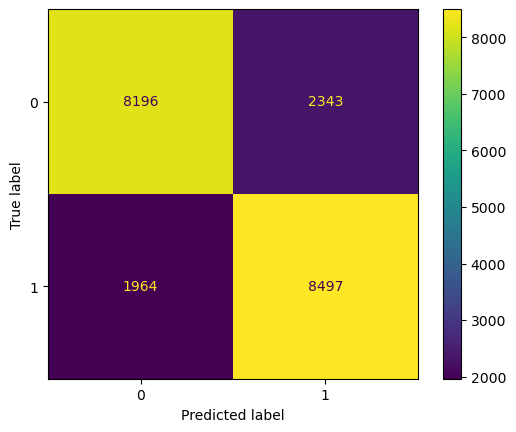

In [276]:
y_testpred=logistic_model.predict(x_test)
y_trainpred=logistic_model.predict(x_train)
print('Test score:',logistic_model.score(x_test,y_test))
print('train score:',logistic_model.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
lrtm=accuracy_score(y_test,y_testpred)*100
lrr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',lrtm)
print('Train accuracy:',lrr1)

### RANDOM FOREST

In [279]:
random_model=RandomForestClassifier(n_estimators=5,random_state=10)

In [280]:
random_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=10)

Test accuracy: 0.921047619047619
train accuracy: 0.9908571428571429
CR:               precision    recall  f1-score   support

           0       0.94      0.90      0.92     10539
           1       0.91      0.94      0.92     10461

    accuracy                           0.92     21000
   macro avg       0.92      0.92      0.92     21000
weighted avg       0.92      0.92      0.92     21000

Test accuracy: 92.1047619047619
Train accuracy: 99.08571428571429


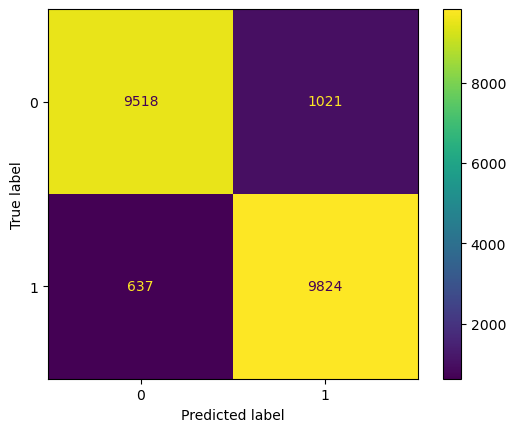

In [281]:
y_testpred=random_model.predict(x_test)
y_trainpred=random_model.predict(x_train)
print('Test accuracy:',random_model.score(x_test,y_test))
print('train accuracy:',random_model.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
rftm=accuracy_score(y_test,y_testpred)*100
rfr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',rftm)
print('Train accuracy:',rfr1)

### SUPPORT VECTOR CLASSIFIER (SVC)

In [283]:
# svm1=SVC(kernel='linear')
# svm1.fit(x_train,y_train)

In [284]:
# y_testpred=svm1.predict(x_test)
# y_trainpred=svm1.predict(x_train)
# print('Test score:',svm1.score(x_test,y_test))
# print('train score:',svm1.score(x_train,y_train))
# print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
# print('CR:',classification_report(y_test,y_testpred))
# svtm=accuracy_score(y_test,y_testpred)*100
# svr1=accuracy_score(y_train,y_trainpred)*100
# print('Test accuracy:',svtm)
# print('Train accuracy:',svr1)

### DECISION TREE

In [286]:
dtree_model= DecisionTreeClassifier()

In [287]:
dtree_model.fit(x_train,y_train)

DecisionTreeClassifier()

Test accuracy: 0.9033333333333333
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.91      0.90      0.90     10539
           1       0.90      0.91      0.90     10461

    accuracy                           0.90     21000
   macro avg       0.90      0.90      0.90     21000
weighted avg       0.90      0.90      0.90     21000

Test accuracy: 90.33333333333333
Train accuracy: 100.0


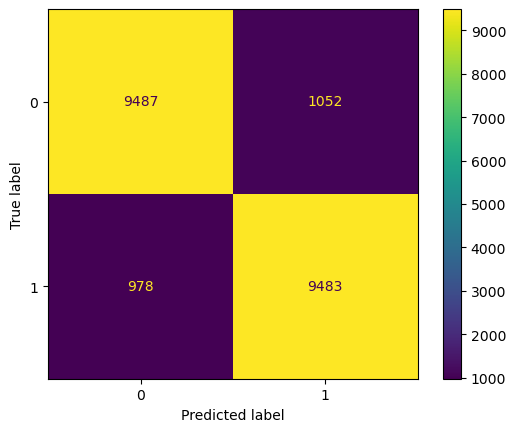

In [288]:
y_testpred=dtree_model.predict(x_test)
y_trainpred=dtree_model.predict(x_train)
print('Test accuracy:',dtree_model.score(x_test,y_test))
print('train accuracy:',dtree_model.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
dttm=accuracy_score(y_test,y_testpred)*100
dtr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',dttm)
print('Train accuracy:',dtr1)

### K NEAREST NEIGHBOUR (KNN)

In [290]:
knn_model= KNeighborsClassifier()

In [291]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

Test accuracy: 0.8224285714285714
train accuracy: 0.876061224489796
CR:               precision    recall  f1-score   support

           0       0.85      0.78      0.82     10539
           1       0.80      0.86      0.83     10461

    accuracy                           0.82     21000
   macro avg       0.82      0.82      0.82     21000
weighted avg       0.82      0.82      0.82     21000

Test accuracy: 82.24285714285713
Train accuracy: 87.60612244897959


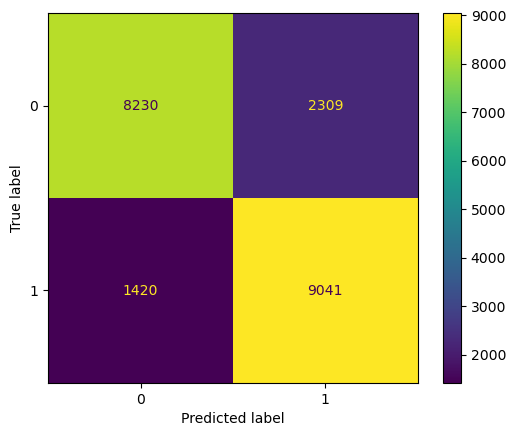

In [292]:
y_testpred=knn_model.predict(x_test)
y_trainpred=knn_model.predict(x_train)
print('Test accuracy:',knn_model.score(x_test,y_test))
print('train accuracy:',knn_model.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
knntm=accuracy_score(y_test,y_testpred)*100
knnr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',knntm)
print('Train accuracy:',knnr1)

### NAIVE BAYES (GaussianNB)

In [294]:
gaus_model=GaussianNB()

In [295]:
gaus_model.fit(x_train,y_train)

GaussianNB()

Test accuracy: 0.765
train accuracy: 0.7650408163265306
CR:               precision    recall  f1-score   support

           0       0.83      0.67      0.74     10539
           1       0.72      0.86      0.78     10461

    accuracy                           0.77     21000
   macro avg       0.77      0.77      0.76     21000
weighted avg       0.77      0.77      0.76     21000

Test accuracy: 76.5
Train accuracy: 76.50408163265307


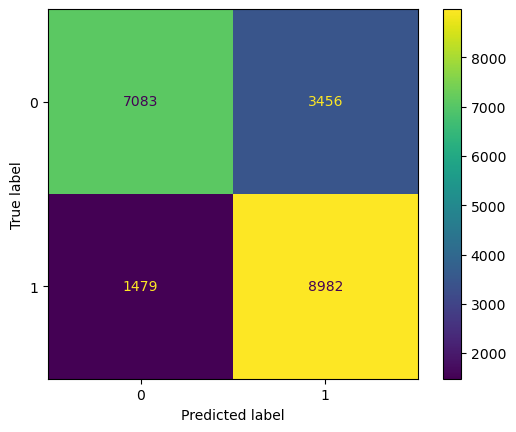

In [296]:
y_testpred=gaus_model.predict(x_test)
y_trainpred=gaus_model.predict(x_train)
print('Test accuracy:',gaus_model.score(x_test,y_test))
print('train accuracy:',gaus_model.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gnbm=accuracy_score(y_test,y_testpred)*100
gn1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gnbm)
print('Train accuracy:',gn1)

# ENSEMBLE MODEL

### GradientBoosting

In [299]:
gradient_model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,random_state=25)

In [300]:
gradient_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=25)

Test accuracy: 0.8815714285714286
train accuracy: 0.8834897959183673
CR:               precision    recall  f1-score   support

           0       0.95      0.80      0.87     10539
           1       0.83      0.96      0.89     10461

    accuracy                           0.88     21000
   macro avg       0.89      0.88      0.88     21000
weighted avg       0.89      0.88      0.88     21000

Test accuracy: 88.15714285714286
Train accuracy: 88.34897959183672


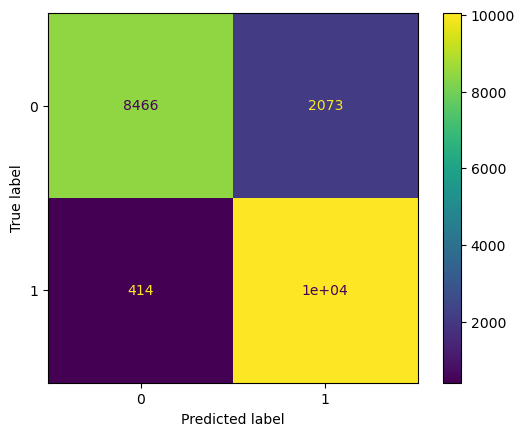

In [301]:
y_testpred=gradient_model.predict(x_test)
y_trainpred=gradient_model.predict(x_train)
print('Test accuracy:',gradient_model.score(x_test,y_test))
print('train accuracy:',gradient_model.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
gbm=accuracy_score(y_test,y_testpred)*100
gbr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',gbm)
print('Train accuracy:',gbr1)

### AdaBoost

In [303]:
adaboost_model=AdaBoostClassifier(n_estimators=50,estimator=None,learning_rate=0.3,random_state=1)

In [304]:
adaboost_model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.3, random_state=1)

Test accuracy: 0.905
train accuracy: 0.9059591836734694
CR:               precision    recall  f1-score   support

           0       0.94      0.87      0.90     10539
           1       0.88      0.94      0.91     10461

    accuracy                           0.91     21000
   macro avg       0.91      0.91      0.90     21000
weighted avg       0.91      0.91      0.90     21000

Test accuracy: 90.5
Train accuracy: 90.59591836734694


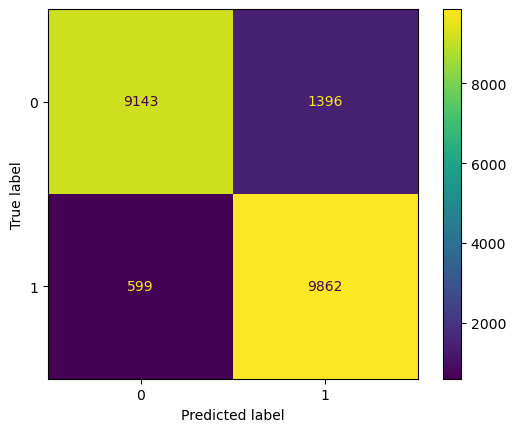

In [305]:
y_testpred=adaboost_model.predict(x_test)
y_trainpred=adaboost_model.predict(x_train)
print('Test accuracy:',adaboost_model.score(x_test,y_test))
print('train accuracy:',adaboost_model.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
adtm=accuracy_score(y_test,y_testpred)*100
adr1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',adtm)
print('Train accuracy:',adr1)

### XGBClassifier

In [307]:
xg_model1=XGBClassifier()

In [308]:
xg_model1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Test accuracy: 0.9527619047619048
train accuracy: 0.9768775510204082
CR:               precision    recall  f1-score   support

           0       0.95      0.96      0.95     10539
           1       0.96      0.95      0.95     10461

    accuracy                           0.95     21000
   macro avg       0.95      0.95      0.95     21000
weighted avg       0.95      0.95      0.95     21000

Test accuracy: 95.27619047619048
Train accuracy: 97.68775510204082


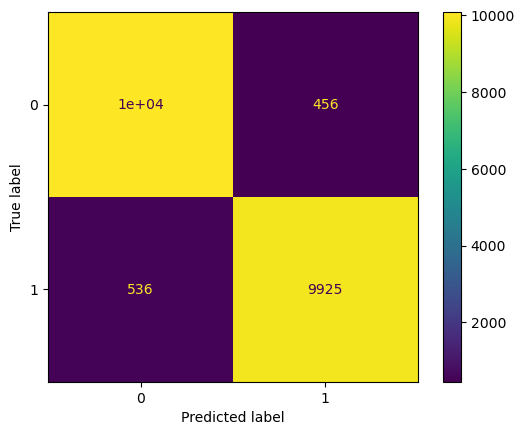

In [309]:
y_testpred=xg_model1.predict(x_test)
y_trainpred=xg_model1.predict(x_train)
print('Test accuracy:',xg_model1.score(x_test,y_test))
print('train accuracy:',xg_model1.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
xgm=accuracy_score(y_test,y_testpred)*100
xgg1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',xgm)
print('Train accuracy:',xgg1)

In [310]:
tb=pd.DataFrame()
tb['model']=pd.Series(["logistic_model","random_model","dtree_model","knn_model","gaus_model","gradient_model","adaboost_model","xg_model1"])
tb['test_accuracy'] = pd.Series([lrtm,rftm,dttm,knntm,gnbm,gbm,adtm,xgm])
tb['train_accuracy'] = pd.Series([lrr1,rfr1,dtr1,knnr1,gn1,gbr1,adr1,xgg1])
tb

,model,test_accuracy,train_accuracy
0,logistic_model,79.490476,79.418367
1,random_model,92.104762,99.085714
2,dtree_model,90.333333,100.000000
3,knn_model,82.242857,87.606122
4,gaus_model,76.500000,76.504082
5,gradient_model,88.157143,88.348980
6,adaboost_model,90.500000,90.595918
7,xg_model1,95.276190,97.687755


# Spliting Data

In [312]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

# HYPER PARAMETER TUNING

# LogisticRegression

In [364]:
lr_gridd = LogisticRegression()
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

lr_gridd = GridSearchCV(lr_gridd, param_grid, cv=5, scoring='accuracy')
lr_gridd.fit(x_train, y_train)

print("Best Parameters:", lr_gridd.best_params_)
print("Best Cross-Validated Accuracy:", lr_gridd.best_score_)

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.8912380952380952


Test score: 0.8925185185185185
train score: 0.890984126984127
CR:               precision    recall  f1-score   support

           0       0.93      0.93      0.93     10503
           1       0.76      0.75      0.75      2997

    accuracy                           0.89     13500
   macro avg       0.85      0.84      0.84     13500
weighted avg       0.89      0.89      0.89     13500

Test accuracy: 89.25185185185185
Train accuracy: 89.0984126984127


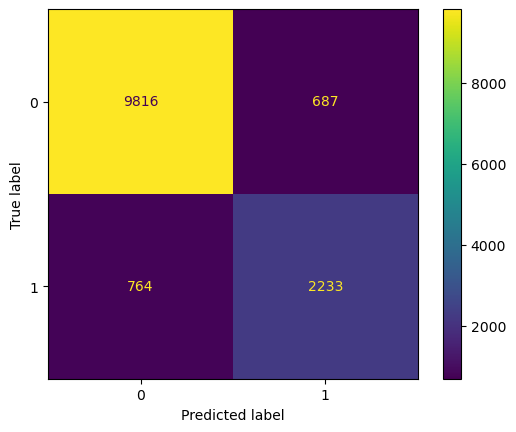

In [365]:
lr_gridd=LogisticRegression(C=1,penalty='l1',solver='liblinear')
lr_gridd.fit(x_train, y_train)

lr_gridd.score(x_test,y_test)
y_testpred=lr_gridd.predict(x_test)
y_trainpred=lr_gridd.predict(x_train)
print('Test score:',lr_gridd.score(x_test,y_test))
print('train score:',lr_gridd.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
l=accuracy_score(y_test,y_testpred)*100
l1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',l)
print('Train accuracy:',l1)

# RandomForestClassifier

In [368]:
rf_gridd=RandomForestClassifier()
param_grid={'max_depth':['None',10,20,30],'max_features':['auto','sqrt','log2']}

rf_gridd=GridSearchCV(rf_gridd,param_grid,cv=10,scoring='accuracy')
rf_gridd.fit(x_train,y_train)


print("Best Parameters:", rf_gridd.best_params_)
print("Best Cross-Validated Accuracy:", rf_gridd.best_score_)

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt'}
Best Cross-Validated Accuracy: 0.9262857142857142


Test score: 0.9234814814814815
train score: 1.0
CR:               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10503
           1       0.88      0.76      0.82      2997

    accuracy                           0.92     13500
   macro avg       0.91      0.87      0.88     13500
weighted avg       0.92      0.92      0.92     13500

Test accuracy: 92.34814814814814
Train accuracy: 100.0


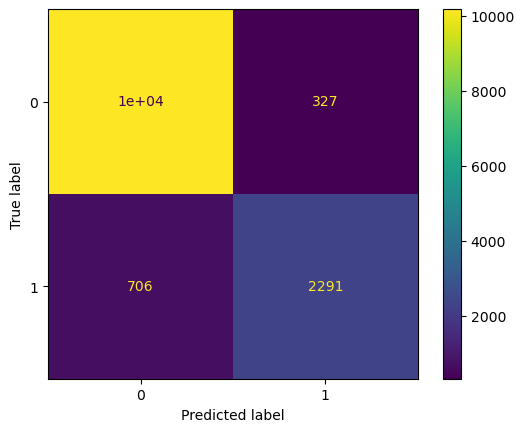

In [369]:
rf_gridd=RandomForestClassifier(max_depth=30,max_features='sqrt')
rf_gridd.fit(x_train,y_train) 

rf_gridd.score(x_test,y_test)
y_testpred=rf_gridd.predict(x_test)
y_trainpred=rf_gridd.predict(x_train)
print('Test score:',rf_gridd.score(x_test,y_test))
print('train score:',rf_gridd.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
r=accuracy_score(y_test,y_testpred)*100
r1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',r)
print('Train accuracy:',r1)

# GradientBoostingClassifier

In [143]:
gb_gridd =GradientBoostingClassifier()
param_grid ={'n_estimators':[100,200],'max_depth':[3,4,5]}

gb_gridd = GridSearchCV(gb_gridd, param_grid, cv=5, scoring='accuracy')
gb_gridd.fit(x_train, y_train)

print("Best Parameters:", gb_gridd.best_params_)
print("Best Cross-Validated Accuracy:", gb_gridd.best_score_)

Best Parameters: {'max_depth': 5, 'n_estimators': 200}
Best Cross-Validated Accuracy: 0.9313015873015873


Test score: 0.9063703703703704
train score: 0.9507936507936507
CR:               precision    recall  f1-score   support

           0       0.94      0.94      0.94     10503
           1       0.79      0.79      0.79      2997

    accuracy                           0.91     13500
   macro avg       0.86      0.87      0.86     13500
weighted avg       0.91      0.91      0.91     13500

Test accuracy: 90.63703703703703
Train accuracy: 95.07936507936508


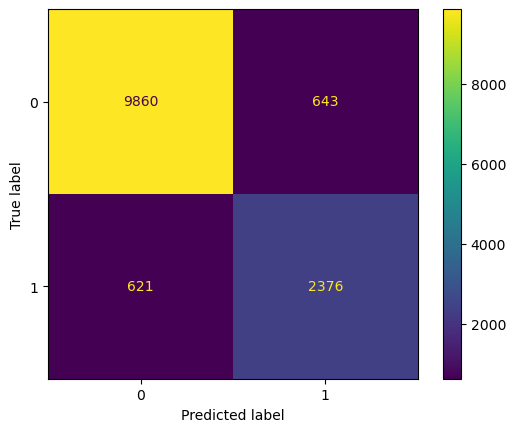

In [144]:
gb_gridd=GradientBoostingClassifier(n_estimators=200,max_depth=5)
gb_gridd.fit(x_train, y_train)
gb_gridd.score(x_test,y_test)
y_testpred=gb_gridd.predict(x_test)
y_trainpred=gb_gridd.predict(x_train)
print('Test score:',gb_gridd.score(x_test,y_test))
print('train score:',gb_gridd.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
g=accuracy_score(y_test,y_testpred)*100
g1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',g)
print('Train accuracy:',g1)

# AdaBoostClassifier

In [374]:
ab_gridd =AdaBoostClassifier()
param_grid ={'n_estimators':[50,100,150],'learning_rate':[0.01,0.1,1.0]}

ab_gridd = GridSearchCV(ab_gridd, param_grid, cv=5, scoring='accuracy')
ab_gridd.fit(x_train, y_train)

print("Best Parameters:", ab_gridd.best_params_)
print("Best Cross-Validated Accuracy:", ab_gridd.best_score_)

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 150}
Best Cross-Validated Accuracy: 0.9150476190476191


Test score: 0.9163703703703704
train score: 0.917079365079365
CR:               precision    recall  f1-score   support

           0       0.94      0.96      0.95     10503
           1       0.83      0.78      0.81      2997

    accuracy                           0.92     13500
   macro avg       0.89      0.87      0.88     13500
weighted avg       0.91      0.92      0.92     13500

Test accuracy: 91.63703703703703
Train accuracy: 91.70793650793651


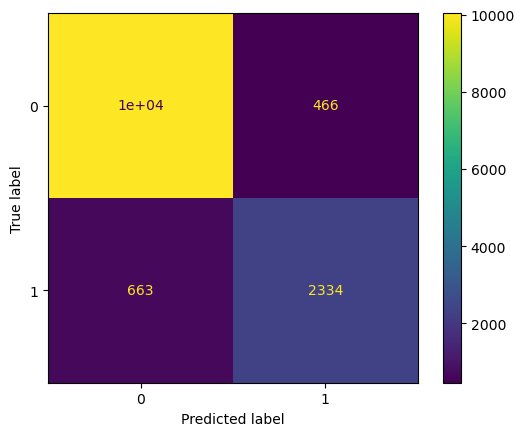

In [375]:
ab_gridd=AdaBoostClassifier(n_estimators=150,learning_rate=1.0)
ab_gridd.fit(x_train, y_train)
ab_gridd.score(x_test,y_test)
y_testpred=ab_gridd.predict(x_test)
y_trainpred=ab_gridd.predict(x_train)
print('Test score:',ab_gridd.score(x_test,y_test))
print('train score:',ab_gridd.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
a=accuracy_score(y_test,y_testpred)*100
a1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',a)
print('Train accuracy:',a1)

# XGBClassifier

In [377]:
xgb_gridd=XGBClassifier()
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

xgb_gridd = GridSearchCV(xgb_gridd, param_grid, cv=5, scoring='accuracy')
xgb_gridd.fit(x_train, y_train)

print("Best Parameters:", xgb_gridd.best_params_)
print("Best Cross-Validated Accuracy:", xgb_gridd.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.9304126984126985


Test score: 0.9316296296296296
train score: 0.9741904761904762
CR:               precision    recall  f1-score   support

           0       0.94      0.97      0.96     10503
           1       0.88      0.80      0.84      2997

    accuracy                           0.93     13500
   macro avg       0.91      0.88      0.90     13500
weighted avg       0.93      0.93      0.93     13500

Test accuracy: 93.16296296296296
Train accuracy: 97.41904761904762


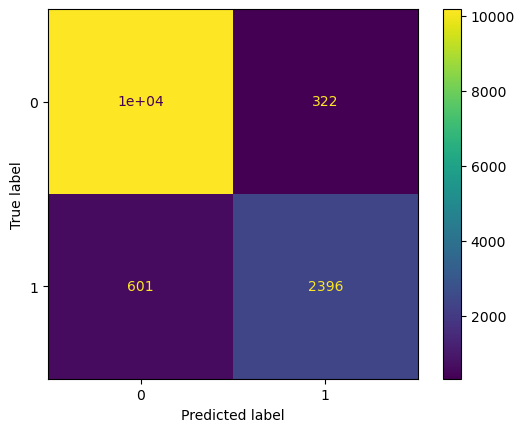

In [378]:
xgb_gridd=XGBClassifier(C =0.1,penalty='l1',solver='liblinear')
xgb_gridd.fit(x_train, y_train)
xgb_gridd.score(x_test,y_test)
y_testpred=xgb_gridd.predict(x_test)
y_trainpred=xgb_gridd.predict(x_train)
print('Test score:',xgb_gridd.score(x_test,y_test))
print('train score:',xgb_gridd.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
x=accuracy_score(y_test,y_testpred)*100
x1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',x)
print('Train accuracy:',x1)

# SUPPORT VECTOR CLASSIFIER (SVC)

In [380]:
# svc_gridd =SVC()
# param_grid ={'C':[0.1,1,10],'kernel':['linear','rbf'],'gamma':['scale','auto']}

# svc_gridd = GridSearchCV(svc_gridd, param_grid, cv=5, scoring='accuracy')
# svc_gridd.fit(x_train, y_train)

# print("Best Parameters:", svc_gridd.best_params_)
# print("Best Cross-Validated Accuracy:", svc_gridd.best_score_)

In [381]:
# svc_gridd=svc{'C':[0.1,1,10]}
# svc_gridd.score(x_test,y_test)
# y_testpred=svc_gridd.predict(x_test)
# y_trainpred=svc_gridd.predict(x_train)
# print('Test score:',svc_gridd.score(x_test,y_test))
# print('train score:',svc_gridd.score(x_train,y_train))
# print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
# print('CR:',classification_report(y_test,y_testpred))
# s=accuracy_score(y_test,y_testpred)*100
# s1=accuracy_score(y_train,y_trainpred)*100
# print('Test accuracy:',s)
# print('Train accuracy:',s1)

# DecisionTreeClassifier

In [383]:
dt_gridd =DecisionTreeClassifier()
param_grid ={'max_depth':[3,5,10],'criterion':['gini','entropy']}

dt_gridd = GridSearchCV(dt_gridd, param_grid, cv=5, scoring='accuracy')
dt_gridd.fit(x_train, y_train)

print("Best Parameters:", dt_gridd.best_params_)
print("Best Cross-Validated Accuracy:", dt_gridd.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10}
Best Cross-Validated Accuracy: 0.9150476190476191


Test score: 0.915037037037037
train score: 0.9268888888888889
CR:               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10503
           1       0.87      0.73      0.79      2997

    accuracy                           0.92     13500
   macro avg       0.90      0.85      0.87     13500
weighted avg       0.91      0.92      0.91     13500

Test accuracy: 91.50370370370369
Train accuracy: 92.68888888888888


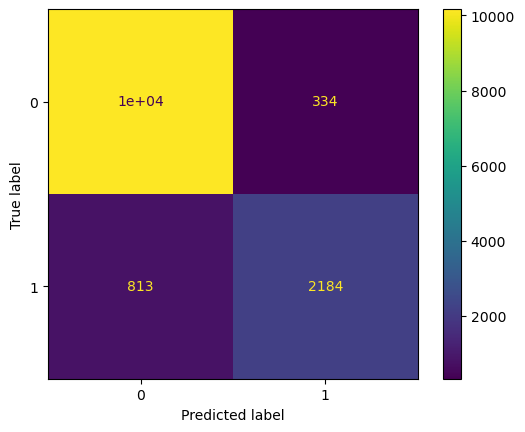

In [384]:
dt_gridd=DecisionTreeClassifier(criterion='entropy',max_depth=10)
dt_gridd.fit(x_train, y_train)
dt_gridd.score(x_test,y_test)
y_testpred=dt_gridd.predict(x_test)
y_trainpred=dt_gridd.predict(x_train)
print('Test score:',dt_gridd.score(x_test,y_test))
print('train score:',dt_gridd.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
d=accuracy_score(y_test,y_testpred)*100
d1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',d)
print('Train accuracy:',d1)

# KNeighborsClassifier

In [386]:
knn_gridd =KNeighborsClassifier()
param_grid ={'n_neighbors':[3,5,27,59,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree']}

knn_gridd = GridSearchCV(knn_gridd, param_grid, cv=5, scoring='accuracy')
knn_gridd.fit(x_train, y_train)

print("Best Parameters:", knn_gridd.best_params_)
print("Best Cross-Validated Accuracy:", knn_gridd.best_score_)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 59, 'weights': 'distance'}
Best Cross-Validated Accuracy: 0.8413333333333334


Test score: 0.8448148148148148
train score: 1.0
CR:               precision    recall  f1-score   support

           0       0.86      0.95      0.91     10503
           1       0.73      0.47      0.57      2997

    accuracy                           0.84     13500
   macro avg       0.80      0.71      0.74     13500
weighted avg       0.83      0.84      0.83     13500

Test accuracy: 84.48148148148148
Train accuracy: 100.0


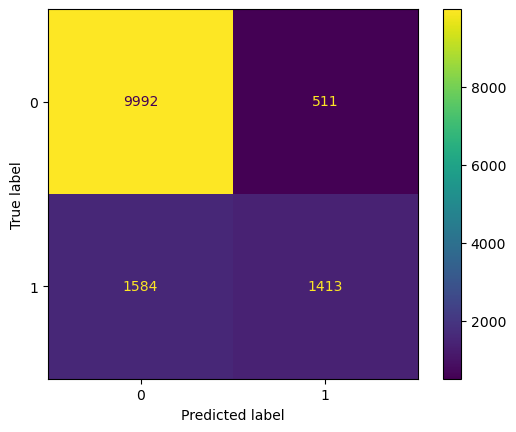

In [387]:
knn_gridd=KNeighborsClassifier(algorithm='auto',n_neighbors=59,weights='distance')
knn_gridd.fit(x_train, y_train)
knn_gridd.score(x_test,y_test)
y_testpred=knn_gridd.predict(x_test)
y_trainpred=knn_gridd.predict(x_train)
print('Test score:',knn_gridd.score(x_test,y_test))
print('train score:',knn_gridd.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
k=accuracy_score(y_test,y_testpred)*100
k1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',k)
print('Train accuracy:',k1)

# GaussianNB

In [389]:
gnb_gridd =GaussianNB()
param_grid ={'var_smoothing':[1e-9,1e-8,1e-7]}
gnb_gridd = GridSearchCV(gnb_gridd, param_grid, cv=5, scoring='accuracy')
gnb_gridd.fit(x_train, y_train)

print("Best Parameters:", gnb_gridd.best_params_)
print("Best Cross-Validated Accuracy:", gnb_gridd.best_score_)

Best Parameters: {'var_smoothing': 1e-09}
Best Cross-Validated Accuracy: 0.8393015873015873


Test score: 0.8402962962962963
train score: 0.8395238095238096
CR:               precision    recall  f1-score   support

           0       0.85      0.97      0.90     10503
           1       0.77      0.40      0.53      2997

    accuracy                           0.84     13500
   macro avg       0.81      0.68      0.71     13500
weighted avg       0.83      0.84      0.82     13500

Test accuracy: 84.02962962962962
Train accuracy: 83.95238095238096


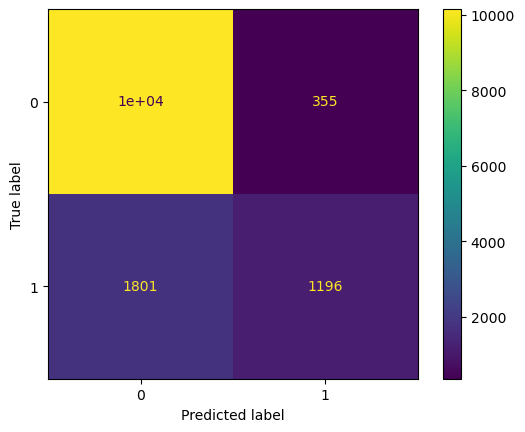

In [390]:
gnb_gridd=GaussianNB(var_smoothing=1e-09)
gnb_gridd.fit(x_train, y_train)
gnb_gridd.score(x_test,y_test)
y_testpred=gnb_gridd.predict(x_test)
y_trainpred=gnb_gridd.predict(x_train)
print('Test score:',gnb_gridd.score(x_test,y_test))
print('train score:',gnb_gridd.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_testpred))
print('CR:',classification_report(y_test,y_testpred))
ga=accuracy_score(y_test,y_testpred)*100
ga1=accuracy_score(y_train,y_trainpred)*100
print('Test accuracy:',ga)
print('Train accuracy:',ga1)

In [391]:
tb=pd.DataFrame()
tb['model']=pd.Series(["lr_gridd","rf_gridd","gb_gridd","ab_gridd","xgb_gridd","dt_gridd","knn_gridd","gnb_gridd"])
tb['test_accuracy'] = pd.Series([l,r,g,a,x,d,k,ga])
tb['train_accuracy'] = pd.Series([l1,r1,g1,a1,x1,d1,k1,ga1])
tb

,model,test_accuracy,train_accuracy
0,lr_gridd,89.251852,89.098413
1,rf_gridd,92.348148,100.000000
2,gb_gridd,93.303704,95.174603
3,ab_gridd,91.637037,91.707937
4,xgb_gridd,93.162963,97.419048
5,dt_gridd,91.503704,92.688889
6,knn_gridd,84.481481,100.000000
7,gnb_gridd,84.029630,83.952381


# DEPLOYMENT

In [183]:
import joblib
joblib.dump(gb_gridd,"loan_data.pkl")

['loan_data.pkl']

In [185]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [187]:
joblib.dump(le1,"le1.pkl")

['le1.pkl']

In [189]:
joblib.dump(le2,"le2.pkl")

['le2.pkl']

In [191]:
joblib.dump(le3,"le3.pkl")

['le3.pkl']

In [193]:
joblib.dump(le4,"le4.pkl")

['le4.pkl']

In [195]:
joblib.dump(le5,"le5.pkl")

['le5.pkl']